In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [9]:
# iris dataset

In [16]:
df = sns.load_dataset("iris") 

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.shape

(150, 5)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
# Закодируем целевой признак (последний столбец) целыми числами для того, чтобы можно было применить алгоритмы машинного обучения (setosa -> 0, versicolor -> 1, virginica -> 2)

In [22]:
from sklearn.preprocessing import LabelEncoder
df['species'] = LabelEncoder().fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# альтернативный способ кодирования данных
df['species'] = pd.factorize(df['species'])[0]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# рассмотрим взаимосвязь признаков в датасете

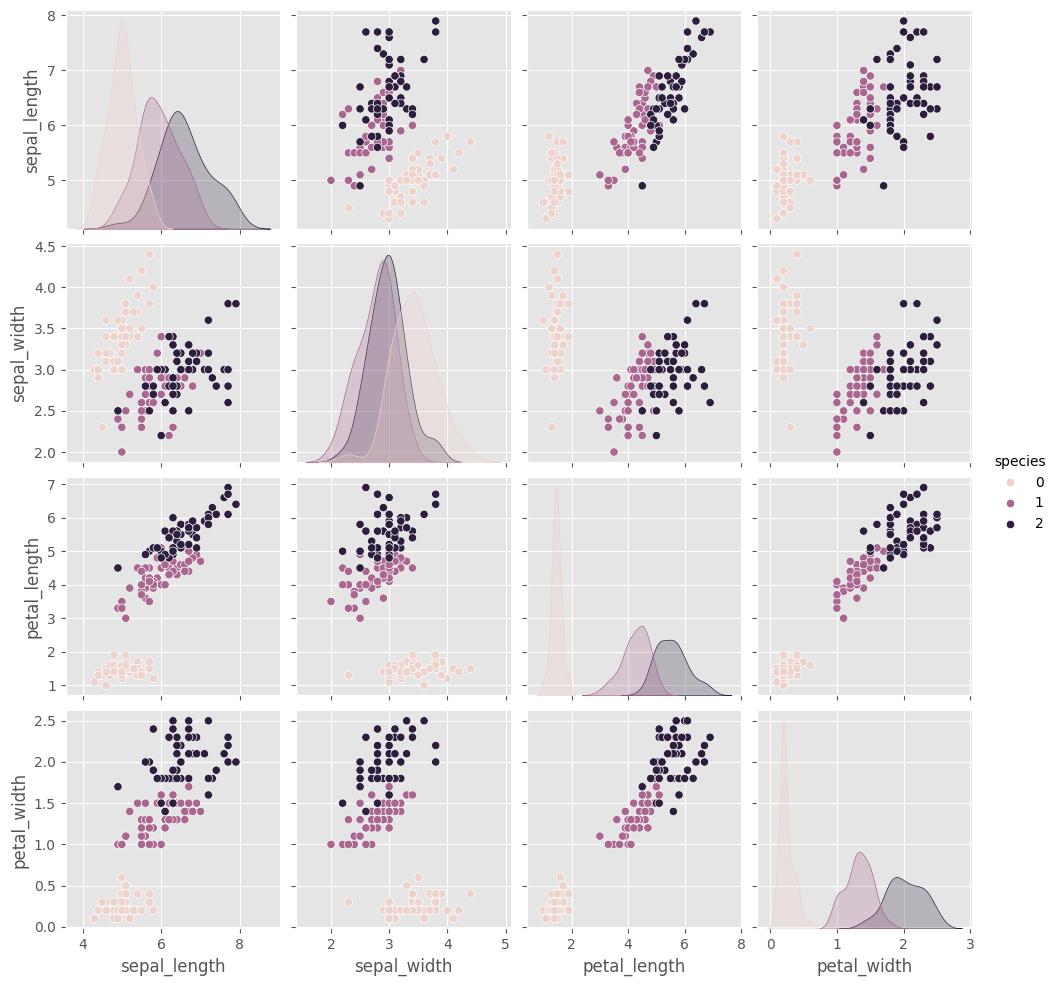

In [27]:
sns.pairplot(df,hue='species')

In [28]:
# импортируем библиотеки

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
# Посмотрим на статистику каждого признака (количество значений, среднее, стандартное отклонение, минимум, квартили, медиана).

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [32]:
# Удалим из датафрейма целевой столбец (df.drop("species", axis=1)) и приведем все остальные признаки к одному масштабу, используя стандартизацию (приведение к нулевому среднему и единичной дисперсии). Целевой столбец сохраним в переменную y.

In [33]:
# Для методов, показанных ниже, необходимо уметь приводить все признаки к одному масштабу, например, на Python известны следующие способы:

# минимакс - нормализация (по умолчанию приводит к масштабу 0, 1, sklearn.preprocessing.MinMaxScaler())
# стандартизация (приведение к нулевому среднему и единичной дисперсии) ( sklearn.preprocessing.StandardScaler())

In [35]:
scal_data, y = StandardScaler().fit_transform(df.drop("species", axis=1)), df["species"]

In [38]:
scal_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [39]:
# Метод главных компонент (Principal Component Analysis) — один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.

# Существует несколько эквивалентных математических формулировок метода главных компонент. 
# Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). 
# Эти направления называются главными компонентами. Метод главных компонент (Principal Components Analysis) основан на определении минимального числа факторов, вносящих наибольший вклад в дисперсию данных. 
# Это один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

# Для сложных данных высокой размерности, где данные не разбиваются тривиально вдоль одного признака, применение PCA может достаточно сильно улучшить качество работы деревьев решений и ансамблей на их основе.

# Одним из применений метода главных компонент является визуализация многомерных данных в двухмерном (или трехмерном) пространстве. 
# Для этого необходимо взять первые две (три) главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать.

In [40]:
# Применим к нашему набору данных для ирисов метод PCA и снизим размерность данных до 2D.

In [41]:
pca = PCA(n_components=2)

In [42]:
# Прогоним встроенный в sklearn PCA метод fit_transform(),
# который объединяет методы fit и transform, и используется для начальной подгонки параметров на обучающем множестве , а также возвращает преобразованный набор данных.

In [45]:
data_pca2D = pca.fit_transform(scal_data)

In [46]:
# Посмотрим на 2 главные компоненты в нашем PCA-представлении данных и на тот процент исходной дисперсии в данных, который они "объясняют".

In [47]:
pca.explained_variance_ratio_*100

array([72.96244541, 22.85076179])

In [49]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            df.columns)))

1 component: 72.96% of initial variance
0.521 x sepal_length + -0.269 x sepal_width + 0.580 x petal_length + 0.565 x petal_width
2 component: 22.85% of initial variance
0.377 x sepal_length + 0.923 x sepal_width + 0.024 x petal_length + 0.067 x petal_width


In [50]:
# Нарисуем получившиеся точки в нашем новом 2D пространстве и увидим, что они хорошо разбиваются на кластеры. Используем модуль matplotlib.pyplot для визуализации. Рассмотрим 2 способа визуализации.

Text(0.5, 1.0, 'PCA')

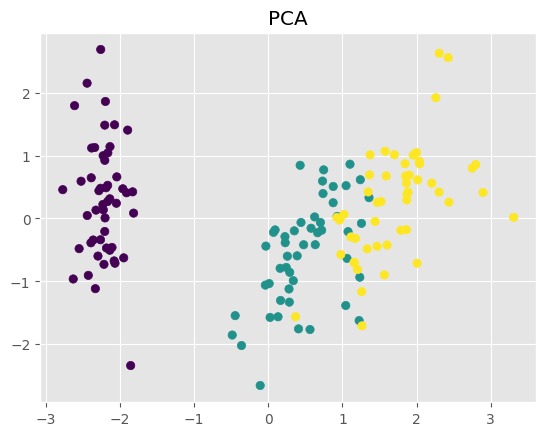

In [52]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c = y) #цвета точек зададим по значениям из целевого столбца, т.е. видам ирисов
plt.title('PCA')

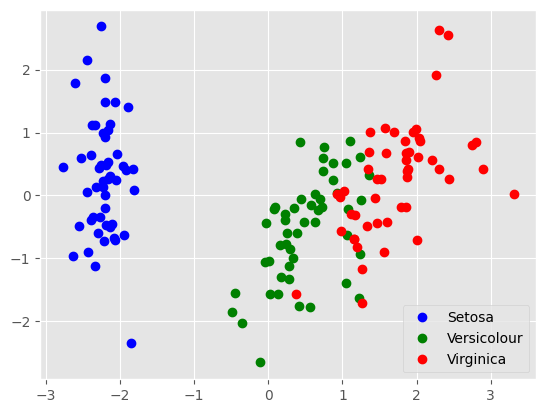

In [57]:
plt.plot(data_pca2D[y==0, 0], data_pca2D[y==0,1],'bo',label = 'Setosa')
plt.plot(data_pca2D[y==1, 0], data_pca2D[y==1,1],'go',label = 'Versicolour')
plt.plot(data_pca2D[y==2, 0], data_pca2D[y==2,1],'ro',label = 'Virginica')
plt.legend(loc = 0)

In [72]:
# На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии (разброса) исходных данных. Раскомментируйте код ниже и ответьте на вопрос, сколько компонент нужно, чтобы оставить 90% дисперсии.

In [73]:
pca = PCA(0.90).fit(scal_data)
print('We need %d components to explain 90%% of variance' 
     % pca.n_components_)

We need 2 components to explain 90% of variance


In [74]:
# Метод k-means – это один из наиболее популярных методов кластеризации. 
#Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

In [75]:
from sklearn.cluster import KMeans, MeanShift,AgglomerativeClustering

In [77]:
# Применим метод k-средних, количество кластеров укажем в параметре n_clusters= 3.

In [78]:
kmeans = KMeans(n_clusters=3, random_state=50, max_iter=100)

In [79]:
kmeans.fit(data_pca2D)
pred_kmeans = kmeans.fit_predict(data_pca2D)

In [80]:
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [81]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [82]:
# ряд с истинными значениями

In [84]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

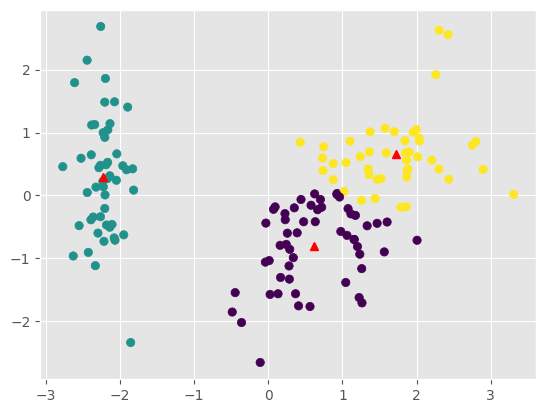

In [94]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=pred_kmeans)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro',marker = '^')

Text(0.5, 1.0, 'k-means')

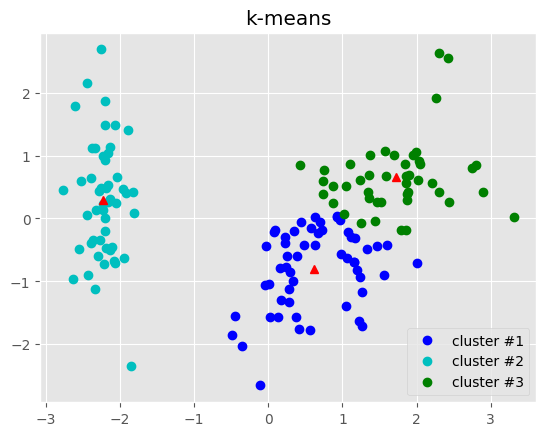

In [93]:
plt.plot(data_pca2D[pred_kmeans ==0,0], data_pca2D[pred_kmeans==0,1], 'bo', label='cluster #1')
plt.plot(data_pca2D[pred_kmeans ==1,0], data_pca2D[pred_kmeans==1,1], 'co', label='cluster #2')
plt.plot(data_pca2D[pred_kmeans == 2,0], data_pca2D[pred_kmeans == 2,1], 'mo', label='cluster #3',c = 'g')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro',marker = '^')
plt.legend(loc=0)
plt.title('k-means')

In [95]:
# Оценим качество кластеризации при помощи ARI. Получили, что наши разбиения схожи.

In [96]:
from sklearn import metrics

In [97]:
metrics.adjusted_rand_score(y,pred_kmeans)

0.6011286543750637

In [98]:
kmeans.fit(data_pca2D)
metrics.adjusted_rand_score(y,kmeans.labels_)

0.6011286543750637

In [110]:
# Аналогично попробуйте кластеризовать набор цифр в 2D-пространстве, полученном при помощи PCA, получите N кластеров. 
# Каждая цифра - это массив из 64 значений. 
# N возьмите равным числу букв в вашем полном имени.

# digits: 10; # samples: 1797; # features 64
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


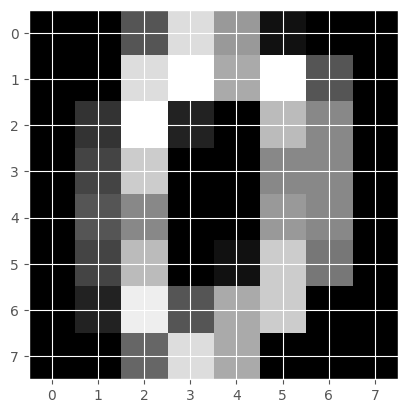

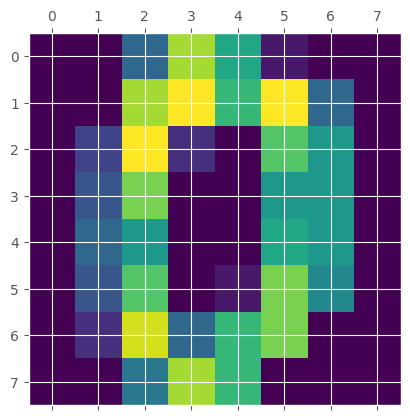

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# в X разместим картинки 8x8, а в y - фактические значения
data = load_digits()#return_X_y=True)
X, y = data.data, data.target
(n_samples, n_features), n_digits = X.shape, np.unique(y).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)
plt.imshow(data.images[0], cmap="grey")#data.images
plt.matshow(data.images[0])

print(X[0])

In [111]:
# Кластеризация методом K-средних для пассажиров Титаника

In [112]:
df_tit = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\titanic_kaggle\\train.csv')

In [113]:
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
from sklearn.cluster import KMeans,MeanShift, AgglomerativeClustering
kmeans = KMeans(n_clusters=2, random_state=50, max_iter=100)

In [115]:
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
# удалим NA значения

In [117]:
df_tit = df_tit.dropna()

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_tit = df_tit.dropna()
df_sf = df_tit[['Sex','Age']]
df_sf.head()

,Sex,Age
1,female,38.0
3,female,35.0
6,male,54.0
10,female,4.0
11,female,58.0


In [127]:
df_sf['Age'].max(), df_sf['Age'].min()

(80.0, 0.92)

In [128]:
def f(x):
    if x == 'male':
        return 0
    else:
        return 1

In [130]:
df_sf['Sex'] = df_tit['Sex'].apply(lambda x:f(x))
df_sf.head()

,Sex,Age
1,1,38.0
3,1,35.0
6,0,54.0
10,1,4.0
11,1,58.0


In [131]:
scal_data = pd.DataFrame(MinMaxScaler().fit_transform(df_sf))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'k-means')

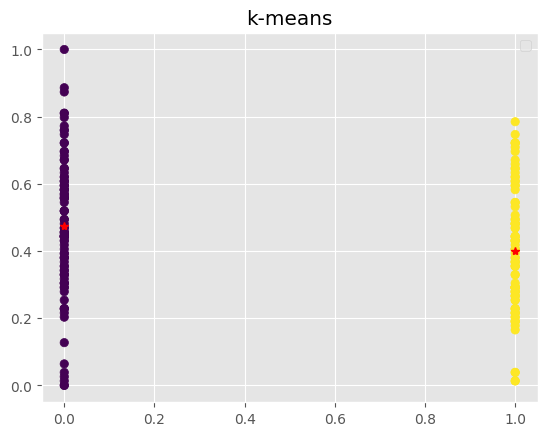

In [138]:
pred_kmeans = kmeans.fit_predict(scal_data)
plt.scatter(scal_data[0],scal_data[1], c = pred_kmeans)
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'r*')
plt.legend(loc=0)
plt.title('k-means')

In [134]:
kmeans.cluster_centers_

array([[7.21644966e-16, 4.74605330e-01],
       [1.00000000e+00, 4.01569757e-01]])

Text(0, 0.5, 'координаты')

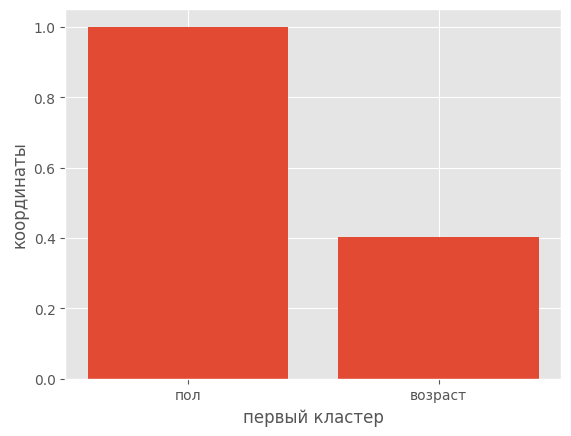

In [147]:
names=['пол','возраст']

plt.bar(names, kmeans.cluster_centers_[1] )
plt.xlabel('первый кластер')
plt.ylabel('координаты')

Text(0, 0.5, 'координаты')

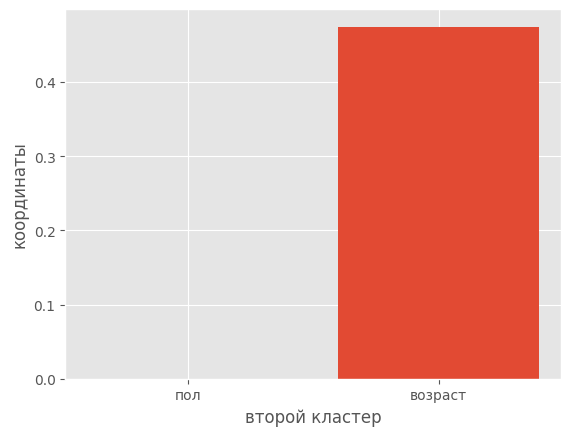

In [149]:
names=['пол','возраст']

plt.bar(names, kmeans.cluster_centers_[0] )
plt.xlabel('второй кластер')
plt.ylabel('координаты')

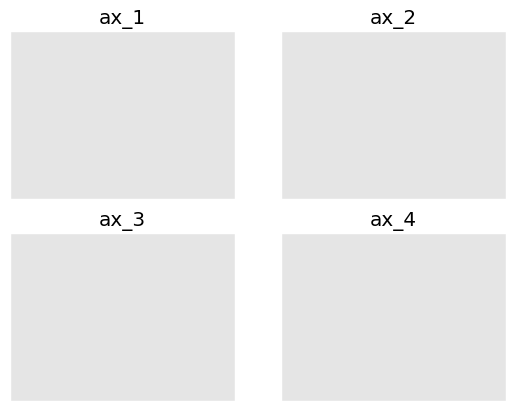

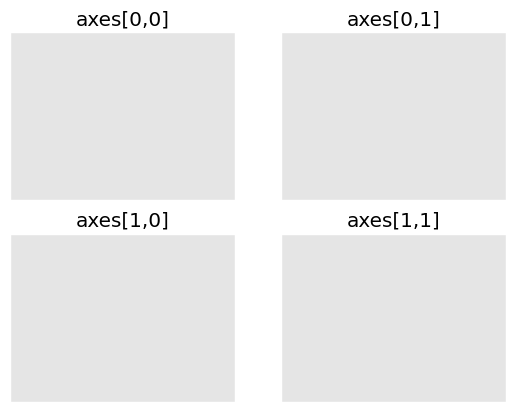

In [150]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.show()

In [151]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0])

In [153]:
clusters = pd.Series(kmeans.labels_)

In [154]:
clusters.value_counts()

0    95
1    88
Name: count, dtype: int64

In [155]:
clusters.groupby(clusters == 1).mean()

False    0.0
True     1.0
dtype: float64

In [156]:
# Вычислим оптимальное число кластеров

In [ ]:
#Искажение: рассчитывается как среднее квадратов расстояний от центров кластеров соответствующих кластеров. 
# Как правило, используется евклидова метрика расстояния.

#Инерция: это сумма квадратов расстояний образцов до их ближайшего центра кластера.

#Мы перебираем значения k от 1 до 9 и вычисляем значения искажений для каждого значения k и вычисляем искажения и инерцию для каждого значения k в данном диапазоне.
 

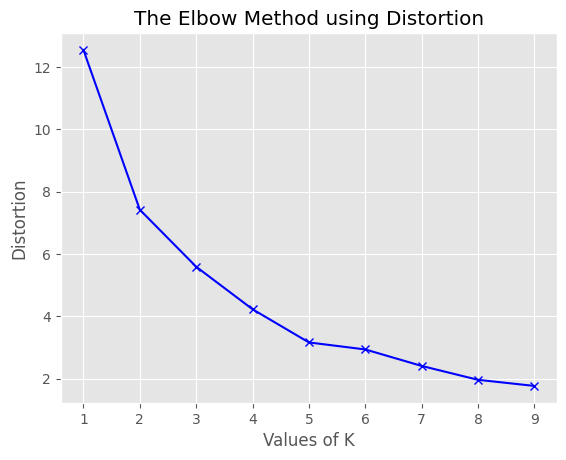

In [157]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range (1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(df_sf)
    #kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(df_sf, kmeanModel.cluster_centers_, 'euclidean' ), axis = 1)) / df_sf.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum (np. min (cdist(df_sf, kmeanModel.cluster_centers_,'euclidean'), axis = 1)) /df_sf.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-' )
plt.xlabel( 'Values of K' )
plt.ylabel( 'Distortion' )
plt.title( 'The Elbow Method using Distortion' )
plt.show()
 

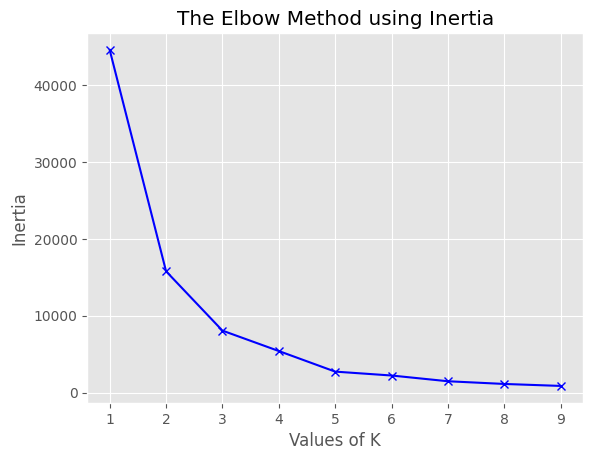

In [158]:
plt.plot(K, inertias, 'bx-' )
plt.xlabel( 'Values of K' )
plt.ylabel( 'Inertia' )
plt.title( 'The Elbow Method using Inertia' )
plt.show()

In [161]:
# Метод главных компонент для пассажиров Титаника

In [163]:
df = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\titanic_kaggle\\train.csv')

In [166]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
def f(x):
    if x == 'male':
        return 0
    else:
        return 1

In [168]:
df['Sex'] = df['Sex'].apply(lambda x: f(x))

In [169]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df = df.drop(['PassengerId'], axis=1)

In [171]:
df = df.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [172]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [173]:
df = df.dropna()

In [176]:
df.shape

(714, 7)

In [177]:
from sklearn.preprocessing import StandardScaler
scal_data, y = StandardScaler().fit_transform(df.drop(['Survived'],axis=1)), df['Survived']

In [178]:
scal_data

array([[ 0.91123237, -0.75905134, -0.53037664,  0.52457013, -0.50589515,
        -0.51897787],
       [-1.47636364,  1.31743394,  0.57183099,  0.52457013, -0.50589515,
         0.69189675],
       [ 0.91123237,  1.31743394, -0.25482473, -0.55170307, -0.50589515,
        -0.50621356],
       ...,
       [-1.47636364,  1.31743394, -0.73704057, -0.55170307, -0.50589515,
        -0.08877362],
       [-1.47636364, -0.75905134, -0.25482473, -0.55170307, -0.50589515,
        -0.08877362],
       [ 0.91123237, -0.75905134,  0.15850313, -0.55170307, -0.50589515,
        -0.50952283]])

In [179]:
from sklearn.decomposition import _pca
pca = PCA(n_components=2)
data_pca2D = pca.fit_transform(scal_data)

In [180]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            df.columns)))

1 component: 29.73% of initial variance
-0.474 x Survived + 0.400 x Pclass + 0.029 x Sex + 0.306 x Age + 0.409 x SibSp + 0.594 x Parch
2 component: 28.93% of initial variance
0.472 x Survived + 0.125 x Pclass + -0.580 x Sex + 0.475 x Age + 0.400 x SibSp + -0.199 x Parch


Text(0.5, 1.0, 'PCA')

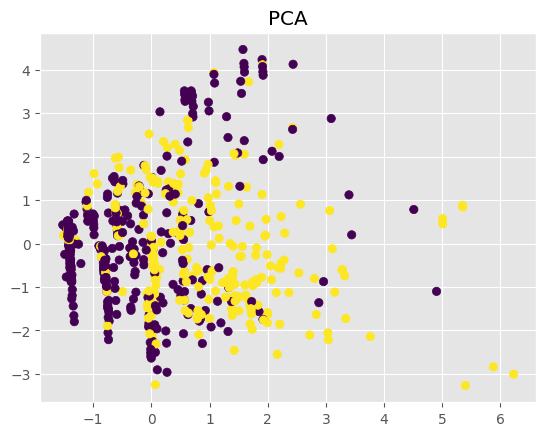

In [184]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=y)
plt.title('PCA')

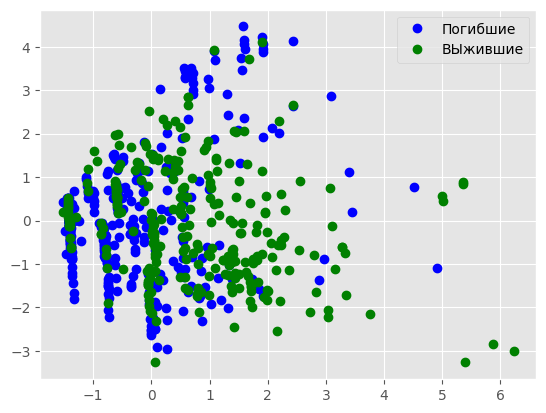

In [188]:
plt.plot(data_pca2D[y == 0, 0], data_pca2D[y == 0, 1], 'bo', label='Погибшие')
plt.plot(data_pca2D[y == 1, 0], data_pca2D[y == 1, 1], 'go', label='ВЫжившие')
plt.legend(loc=0)